# Python：语法解析-面向对象编程

> “Python 是一门面向对象的编程语言”  

## 简介

本章的目的不是教你编程，而是为了让你更好地理解 Python 的语法规则。

对于初学 Python 的人而言，“Python 是一门面向对象的编程 (OOP) 语言” 这样的表述想必并不陌生。然而，“面向对象”究竟是什么，尤其是“对象”的概念，却常常让人摸不着头脑。以众多 Stata 老用户为例，当他们初次见到下面这段代码时，往往会陷入困惑：

In [ ]:
import statsmodels.api as sm
import pandas as pd

# 加载示例数据
mtcars = sm.datasets.get_rdataset('mtcars', 'datasets').data

# 模型 1
X1 = mtcars[['wt']]
X1 = sm.add_constant(X1)
y = mtcars['mpg']
model1 = sm.OLS(y, X1).fit()
print(model1.summary())


                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.753
Model:                            OLS   Adj. R-squared:                  0.745
Method:                 Least Squares   F-statistic:                     91.38
Date:                Sat, 24 May 2025   Prob (F-statistic):           1.29e-10
Time:                        01:31:42   Log-Likelihood:                -80.015
No. Observations:                  32   AIC:                             164.0
Df Residuals:                      30   BIC:                             167.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         37.2851      1.878     19.858      0.0



在 `mtcars = sm.datasets.get_rdataset('mtcars', 'datasets').data` 这条语句中，呈现出 `sm.A.B().C` 的形式。初学者不免产生如下疑问：

- 这里面哪些是函数 (function)？
- 哪些是方法 (method)？
- 哪些又是对象的属性呢？
- 需要学习哪些概念才能搞清楚这些语句的编写规则？

同样令人费解的语句还有 `model1 = sm.OLS(y, X1).fit()`。

上述问题其实是近两年 Python 学习者普遍面临的困惑。有了 AI 助手（如豆包、Copilot 等），很多人得以快速上手 Python。但好景不长，大家很快就会遭遇瓶颈。面对 AI 自动生成的代码，自己往往一知半解，基本不具备调试和修改代码的能力。这就导致在使用 Python 一段时间后，自身编写代码的能力始终难以显著提升，还总是花费大量时间进行调试，从而无法集中精力思考更高级的问题。

为此，本文将详细介绍 Python 面向对象编程的核心概念，帮你深入理解 Python 代码的逻辑和结构关系，进而提升编写 Python 代码的能力。接下来，我们就将逐步解答上述代码中的疑问。



## 类 v.s 对象：直观解释

>**解读 1 - 填写表格**：空白表是「类」，填好的表式「对象 (实例)」

我们经常需要填写纸质或电子表格：去医院看病、网上购物、或者参加婚礼需要回复 RSVP。**表格**就是一种标准化的方式，方便他人或机构收集你的信息。不同的表格关注的信息各不相同：你会在医生的表格上填写敏感的健康状况，而婚礼邀请回复表格则关注你会带几位嘉宾 —— 这两种信息互不相干。

在 Python 中，**class**（类）、**type**（类型）、**data type**（数据类型）这些术语基本等价。可以按照如下逻辑来理解：

- 可以把**类**看作是 Python **对象**（也称为「实例」）的**模板 (blueprint)**；
- 对象则是具体的数据实体，代表某个「名词」（可以是医院里的病人、网上的购物订单、婚礼的嘉宾等等）。
- **类**就像是一张空白表格模板，而**对象**就是基于这个模板，实际填写了数据的具体表格。

比如，下图中的 RSVP 回复表格就是类的一个例子，而具体填写好的 RSVP 回执，就是一个对象：

![](https://fig-lianxh.oss-cn-shenzhen.aliyuncs.com/20250509083144.png)

Source：[15 Object-Oriented Programming and Classes](https://inventwithpython.com/beyond/chapter15.html)


&emsp;

>**另一种类比**：电子表格（Excel）

你还可以把类和对象类比为电子表格（比如 Excel），如下图所示。表格的**列名**就类似于类（定义了每个属性），而表格的每一**行**就相当于一个具体对象（包含具体的数据）。

![](https://fig-lianxh.oss-cn-shenzhen.aliyuncs.com/20250509083406.png)

下面，我们做详细介绍。

## 类、对象、封装、继承和多态

### 类（Class）

类是对象的模板，它定义了对象的属性和方法，可将其视为一种自定义的数据类型。以 `Person` 类为例：



In [ ]:
class Person:
    def __init__(self, name, age):
        self.name = name
        self.age = age

    def introduce(self):
        print(f"我叫 {self.name}，今年 {self.age} 岁。")
        


`Person` 类包含两个函数，分别是 `__init__()` 和 `introduce()`。前者用于定义「对象的**属性**」，后者用于定义「对象的**方法**」。具体说明如下：

- `__init__()` 是一个特殊的函数，称为「构造函数」。它的作用是在创建类的对象时，初始化 **对象的属性**。在这个例子里，`__init__()` 定义了 `Person` 类的两个属性，即 `name` 和 `age`。
- `introduce()` 函数定义了 `Person` 类的一个**方法**，其功能是打印出对象的 `name` 和 `age` 信息。

这里要着重说明一下 `self` 这个参数。在 Python 的类中，`self` 是一个约定俗成的参数名，它代表类的实例对象本身。当你调用类的方法时，Python 会自动将调用该方法的对象作为第一个参数传递给 `self`。借助 `self`，方法能够访问和修改对象的属性。

例如，在 `__init__()` 方法里，`self.name = name` 这一操作把传入的 `name` 参数值赋给了对象的 `name` 属性；在 `introduce()` 方法中，`self.name` 和 `self.age` 用于获取对象的 `name` 和 `age` 属性值。

### 对象（Object）

对象是类的实例。通过类能够创建多个不同的对象，每个对象都有自己独立的属性值。例如：



In [ ]:
p1 = Person("张三", 20)
p2 = Person("李四", 25)

print(p1.name)  # 输出: 张三
print(p2.name)  # 输出: 李四

p1.introduce()  # 输出: 我叫 张三，今年 20 岁。
p2.introduce()  # 输出: 我叫 李四，今年 25 岁。


张三
李四
我叫 张三，今年 20 岁。
我叫 李四，今年 25 岁。


此例中，`p1` 和 `p2` 是 `Person` 类的两个不同对象。`p1.name` 的值是 "张三"，`p2.name` 的值是 "李四"，这体现了不同对象的属性可以有不同的值。



### 封装（Encapsulation）

封装是面向对象编程的一个重要特性，它指的是将数据（属性）和操作数据的方法捆绑在一起，并且对外部隐藏对象的内部实现细节。封装的作用主要体现在以下几个方面：

- **数据保护**：防止外部代码直接访问和修改对象的属性，从而避免数据被意外修改或破坏。
- **简化接口**：只向外部暴露必要的方法，隐藏内部实现细节，降低外部代码与对象之间的耦合度，使代码更易于维护和扩展。

在 Python 中，可以通过访问控制来实现封装。虽然 Python 没有像其他语言那样严格的访问修饰符（如 `private`、`protected`），但可以通过约定来表示属性或方法的访问级别。以单下划线开头的属性或方法被视为受保护的，以双下划线开头的属性或方法被视为私有的。例如：

In [ ]:
class BankAccount:
    def __init__(self, balance):
        self.__balance = balance

    def deposit(self, amount):
        self.__balance += amount

    def withdraw(self, amount):
        if amount <= self.__balance:
            self.__balance -= amount
        else:
            print("余额不足")

    def get_balance(self):
        return self.__balance

account = BankAccount(1000)
account.deposit(500)
account.withdraw(200)
print(account.get_balance())  # 输出: 1300


1300




在这个例子中，`__balance` 是一个私有属性，外部不能直接访问，只能通过 `deposit`、`withdraw` 和 `get_balance` 等方法来操作。这样就保证了账户余额的安全性，外部代码无法随意修改余额。

### 4. 继承（Inheritance）

继承是指一个类可以继承另一个类的属性和方法。被继承的类称为父类（基类），继承的类称为子类（派生类）。子类可以扩展父类的功能，也可以重写父类的方法。例如：



In [ ]:
class Student(Person):
    def __init__(self, name, age, student_id):
        super().__init__(name, age)
        self.student_id = student_id

    def study(self):
        print(f"{self.name} 正在学习。")

stu = Student("王五", 18, "001")
stu.introduce() 
stu.study()    


我叫 王五，今年 18 岁。
王五 正在学习。



在这个例子中，`Student` 类继承了 `Person` 类的属性和方法，并添加了自己的属性 `student_id` 和方法 `study`。`super().__init__(name, age)` 调用了父类的构造函数，对 `name` 和 `age` 属性进行初始化。

### 多态（Polymorphism）

多态是指不同的对象可以对同一个操作做出不同的响应。下面通过几个例子来帮助你理解多态的概念和应用。

#### 简单数据类型示例

```python
a = 5
b = "apple"
print(a * 3)  # 输出: 15
print(b * 3)  # 输出: appleappleapple

```

可见，`*` 运算符对于整数 `a` 和字符串 `b` 有不同的行为：

- 对于整数，`*` 表示乘法运算；
- 对于字符串，`*` 表示重复字符串。

这就是多态的体现，同一个运算符在不同的数据类型上有不同的操作。

#### 类的方法重写示例



In [8]:

class Shape:
    def area(self):
        pass

class Rectangle(Shape):
    def __init__(self, length, width):
        self.length = length
        self.width = width

    def area(self):
        return self.length * self.width

class Circle(Shape):
    def __init__(self, radius):
        self.radius = radius

    def area(self):
        return 3.14 * self.radius * self.radius

shapes = [Rectangle(4, 5), Circle(3)]
for shape in shapes:
    print(shape.area())


20
28.259999999999998



在这个例子中，`Rectangle` 和 `Circle` 类都继承自 `Shape` 类，并且重写了 `area` 方法。当我们遍历 `shapes` 列表并调用每个对象的 `area` 方法时，不同的对象会根据自己的实现方式计算并返回面积，这也是多态的应用。

#### Python 支持多态的原因

Python 能够支持多态，主要得益于其动态类型的特性。在 Python 中，变量在声明时不需要预先指定数据类型，变量的类型是在运行时动态确定的。这意味着一个变量可以在不同的时刻引用不同类型的对象。当调用一个函数或方法时，Python 不会关心对象的具体类型，只要对象实现了所需的方法或属性，就可以正常调用。

这种特性使得 Python 代码更加灵活，能够轻松实现多态。例如，在上面的 `shapes` 列表中，`Rectangle` 和 `Circle` 对象虽然类型不同，但都实现了 `area` 方法，因此可以统一调用 `area` 方法来计算面积。

### 面向对象概念在具体包和函数中的应用

在实际的 Python 编程中，面向对象编程的概念广泛应用于各种包和函数中。下面以 `pandas` 和 `matplotlib` 这两个常用的包为例进行说明。

#### `pandas` 中的应用

`pandas` 是一个用于数据处理和分析的强大包，其中大量使用了类和对象的概念。例如，`DataFrame` 是 `pandas` 中最常用的类之一，用于表示二维表格数据。



In [ ]:
import pandas as pd

# 创建一个 DataFrame 对象
data = {
    'Name': ['张三', '李四', '王五'],
    'Age': [20, 25, 18]
}
df = pd.DataFrame(data)

# 使用 DataFrame 的方法
print(df.head())      # 查看数据集行数
print('-' * 20)
print(df.describe().T.round(2))  # T 表示转置


  Name  Age
0   张三   20
1   李四   25
2   王五   18
--------------------
     count  mean   std   min   25%   50%   75%   max
Age    3.0  21.0  3.61  18.0  19.0  20.0  22.5  25.0



此例中，`pd.DataFrame` 是一个类，`df` 是 `DataFrame` 类的一个对象。

我们可以调用 `df` 对象的各种方法，如 `head()` 和 `describe()`，来对数据进行操作和分析。甚至可以采用链式调用的方式来连续执行多个操作，如 `df.describe().T.round(2)` 表示对 `df` 对象依次进行如下操作：计算基本统计量 &rarr; 转置 &rarr; 四舍五入 (保留两位有效数字)。



#### `matplotlib` 中的应用

`matplotlib` 是一个用于数据可视化的包，也广泛应用了面向对象编程的思想。例如，我们可以使用 `Figure` 和 `Axes` 类来创建和定制图形。



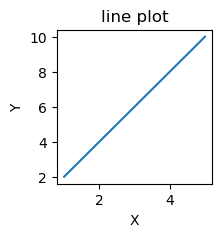

In [ ]:
import matplotlib.pyplot as plt

# 创建一个 Figure 对象和一个 Axes 对象
fig, ax = plt.subplots(figsize=(2, 2))

# 绘制数据
x = [1, 2, 3, 4, 5]
y = [2, 4, 6, 8, 10]
ax.plot(x, y)

# 设置图形属性
ax.set_title('line plot')
ax.set_xlabel('X')
ax.set_ylabel('Y')

# 显示图形
plt.show()




在这个例子中，`fig` 是 `Figure` 类的对象，`ax` 是 `Axes` 类的对象。

我们可以通过调用 `ax` 对象的方法，如 `plot()`、`set_title()`、`set_xlabel()` 和 `set_ylabel()` 来绘制和定制图形。这体现了面向对象编程在 `matplotlib` 中的应用，通过将图形的不同部分封装成对象，使得图形的创建和定制更加灵活和可控。


## 包、函数、方法和属性

我们先简要介绍一下理解复杂语句所需的基础概念。

### 包（Package）和模块（Module）

#### 模块（Module）

- 模块是单个 `.py` 文件，包含函数、类、变量等代码。
- 例如：
  - `arrow.api.py` 是一个模块，包含 `get()` 函数。
  - `numpy.random.py` 也是一个模块，内含若干个用于生成随机数的函数。

#### 包（Package）

包是一个包含多个模块的**目录**，通常还包含一个 `__init__.py` 文件。

一个包中可以包含多个子包，而每个包中又可以包含多个模块。包的目录结构类似于文件系统的目录结构。`__init__.py` 文件的作用是标识该目录是一个包，更重要的是，它详细记录了这个包里都有哪些模块和子包。

包通过目录结构组织代码，例如：

  ```python
  pandas/               # 根包
    __init__.py         # 标识这是一个包
    core/               # 子包
      __init__.py
      frame.py          # 模块（定义 DataFrame）
      series.py         # 模块（定义 Series）
    io/                 # 子包
      __init__.py
      excel.py          # 模块（处理 Excel 文件）
  ```

比如，`arrow` 是一个用于处理日期和时间的包，该包的程序文件存放于 `arrow` 目录下：

![](https://fig-lianxh.oss-cn-shenzhen.aliyuncs.com/20250524004230.png)

其中包含 `__init__.py` 文件和其他模块文件（如 `arrow.py`、`util.py` 等）。当你使用 `import arrow` 时，Python 会自动执行 `__init__.py` 文件中的代码，从而初始化包的命名空间。

你若执行 `from arrow import api`，则会导入 `arrow` 包中的 `api` 模块。然后你可以使用 `api` 模块中的函数和类，例如 `api.get()`。


In [ ]:
import arrow as ar

# 查看 arrow 的类型
print(type(ar)) 

# 查看 arrow 的路径
print(ar.__file__)  

# 输出类似：/path/to/site-packages/arrow/__init__.py
# 这表明 arrow 是包含多个子包的根目录。

<class 'module'>
c:\ProgramData\anaconda3\Lib\site-packages\arrow\__init__.py


同理，你可以使用如下方法查看其他包的路径：


In [ ]:
import pandas as pd
print(pd.__file__)  # 查看 pandas 的路径

c:\ProgramData\anaconda3\Lib\site-packages\pandas\__init__.py



### 函数（Function）和方法（Method）

函数是一段完成特定任务的独立代码块，可以直接调用。而方法是与对象关联的函数，必须通过对象来调用。例如，

- 在 `sm.datasets.get_rdataset()` 中，`get_rdataset()` 是一个函数，它属于 `statsmodels` 包中 `datasets` 模块。
- 在 `model1 = sm.OLS(y, X1).fit()` 中：
  - `OLS()` 是 `sm` 包中的一个函数，用于创建一个普通最小二乘回归模型对象。
  - `sm.OLS(y, X1)` 创建了一个 `OLS` **对象**。
    - `fit()` 是 `sm.OLS(y, X1)` 创建的对象的**方法**。

#### 类中的属性（Attribute）和方法（Method）

**属性** 是类或对象的数据成员，而 **方法** 则是类或对象的函数成员。

因此，在 `mtcars = sm.datasets.get_rdataset('mtcars', 'datasets').data` 中，`.data` 就是 `get_rdataset()` 函数返回的对象的一个属性，里面存储着对象里的数据。

## 解析复杂语句

现在我们来详细解析引言中提到的复杂语句：

```python
import statsmodels.api as sm

# 加载示例数据
mtcars = sm.datasets.get_rdataset('mtcars', 'datasets').data
mtcars.head()
```

具体解释如下：

- `sm` 是 `statsmodels.api` 模块的别名。
- `datasets` 是 `sm` 下的一个子模块，专门用于访问内置或外部数据集。
- `get_rdataset('mtcars', 'datasets')` 是 `datasets` 子模块中的一个函数，用于从 R 的数据集仓库中的 **datasets** 包中获取名为 `'mtcars'` 的数据集。这个函数会返回一个包含数据集及其元信息 (meta information) 的对象 (可以假想为名称为 **mtcars_object** 的对象)。
- `.data` 是对象 **mtcars_object** 的一个属性，用于提取实际的数据内容（通常为一个 `pandas.DataFrame`）。
- 因此，最终得到的 `mtcars` 变量就是一个 `pandas.DataFrame` 对象，包含了 `'mtcars'` 数据集的实际数据。
- `mtcars.head()` 是 `pandas.DataFrame` 对象的方法，用于查看数据集的前几行数据。

需要注意的是，在上述语句中，`datasets` 这个关键词出现了两次，两者含义不同，不要混淆：

- 第一次是指 `sm` 下的 `datasets` 子模块；
- 第二次是作为参数传递给 `get_rdataset()` 函数，它是 R 语言中的一个扩展包的名称，而 `mtcars` 则是 **datasets** 包中的一个数据集。

把上述代码拆成两行更有助于理解 **模块**、**函数** 和 **属性** 这三个概念的区别：

```python
import statsmodels.api as sm

# 获取数据集对象：'object = 模块.函数()' 格式
#        本例中：'object = 模块.子模块.函数(参数1, 参数2)' 格式
mtcars_object = sm.datasets.get_rdataset('mtcars', 'datasets') 

# 获取数据集内容：'object.属性' 格式
mtcars_df = mtcars_object.data 
```

可以将这行代码拆解为以下几步，更便于初学者理解：

```python
# 第一步：获取 datasets 子模块
datasets_module = sm.datasets

# 第二步：调用 get_rdataset 函数获取数据集对象
rdataset = datasets_module.get_rdataset('mtcars', 'datasets')
  # - 'mtcars' 是数据集的名称
  # - 'datasets' 是数据集所在的包名
# 第三步：通过 data 属性获取实际的数据
mtcars = rdataset.data
```

至此，代码的第二部分也很容易理解了：

```python
# 模型 1
X1 = data[['weight']]
X1 = sm.add_constant(X1)
y = data['mpg']
model1 = sm.OLS(y, X1).fit()
```

解释如下：

- `sm.OLS(y, X1)`：
    - `OLS` 是 `statsmodels.api` 模块中的一个类，用于创建一个普通最小二乘回归模型的对象。这里传入的参数 `y` 是因变量，`X1` 是自变量。
- `.fit()`：是 `sm.OLS(y, X1)` 创建的对象的方法，用于拟合模型，即根据输入的数据计算模型的参数。

 


## 参考资料

- [Python 100 Days - 18.面向对象编程入门](https://github.com/jackfrued/Python-100-Days/blob/master/Day01-20/18.%E9%9D%A2%E5%90%91%E5%AF%B9%E8%B1%A1%E7%BC%96%E7%A8%8B%E5%85%A5%E9%97%A8.md)




## 总结

- 模块是单个 `.py` 文件，包含函数、类、变量等代码。
- 包是一个包含多个模块的目录，通常还包含一个 `__init__.py` 文件。
- 类是对象的模板，它定义了对象的属性和方法。
- 对象是类的实例。通过类能够创建多个不同的对象，每个对象都有自己独立的属性值。
- 封装是将数据（属性）和操作数据的方法捆绑在一起，并对外部隐藏对象的内部实现细节。
- 继承是一个类可以继承另一个类的属性和方法。
- 多态是指不同的对象可以对同一个操作做出不同的响应。
- 函数是一段完成特定任务的独立代码块，可以直接调用。